In [3]:
import pandas as pd

In [5]:
data = pd.read_csv("diabetes.csv")

In [19]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [27]:
result = data.corr()
print(result)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

In [33]:
data["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [39]:
import matplotlib.pyplot as plt
import seaborn as sn

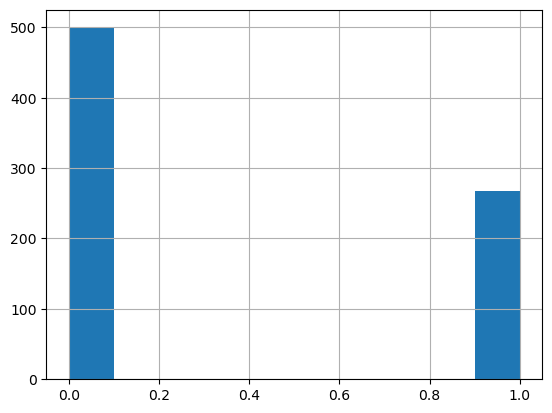

In [41]:
data["Outcome"].hist()
plt.show()

In [55]:
#tien xu ly : tach targer, featuer -> chia train, test -> scaler(dua ve cung do lon)
#chia cot du lieu ra featue rieng va target rieng
target = "Outcome"
x = data.drop(target, axis = 1)
y = data[target]
print(x.head(5))
print(y.head(5))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [73]:
#chia du lieu thanh train, test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 100, shuffle = False)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

614 614


In [97]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)
x_train_scaler[1]

array([-0.83784417, -1.08478865, -0.12876651,  0.52327129, -0.68897765,
       -0.66389037, -0.38675734, -0.18677449])

In [118]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
cls = SVC()
#cls = RandomForestClassifier()
cls.fit(x_train,y_train)

SVC()

In [126]:
y_predict = cls.predict(x_test)
for i, j in zip(y_test, y_predict):
    print("Nhan :  {} du doan : {}".format(i,j))

Nhan :  1 du doan : 1
Nhan :  0 du doan : 0
Nhan :  0 du doan : 0
Nhan :  0 du doan : 0
Nhan :  1 du doan : 0
Nhan :  1 du doan : 0
Nhan :  0 du doan : 0
Nhan :  0 du doan : 0
Nhan :  0 du doan : 1
Nhan :  0 du doan : 0
Nhan :  0 du doan : 0
Nhan :  0 du doan : 0
Nhan :  0 du doan : 0
Nhan :  0 du doan : 0
Nhan :  0 du doan : 0
Nhan :  0 du doan : 0
Nhan :  1 du doan : 0
Nhan :  0 du doan : 0
Nhan :  0 du doan : 0
Nhan :  0 du doan : 0
Nhan :  0 du doan : 0
Nhan :  1 du doan : 0
Nhan :  0 du doan : 0
Nhan :  0 du doan : 0
Nhan :  1 du doan : 0
Nhan :  0 du doan : 0
Nhan :  0 du doan : 0
Nhan :  0 du doan : 0
Nhan :  1 du doan : 0
Nhan :  0 du doan : 0
Nhan :  0 du doan : 0
Nhan :  0 du doan : 1
Nhan :  1 du doan : 1
Nhan :  1 du doan : 1
Nhan :  1 du doan : 0
Nhan :  0 du doan : 0
Nhan :  0 du doan : 0
Nhan :  0 du doan : 0
Nhan :  0 du doan : 0
Nhan :  0 du doan : 0
Nhan :  0 du doan : 0
Nhan :  1 du doan : 1
Nhan :  0 du doan : 0
Nhan :  0 du doan : 1
Nhan :  0 du doan : 0
Nhan :  1 

In [124]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict, labels=[0,1]))


              precision    recall  f1-score   support

           0       0.76      0.90      0.82        99
           1       0.73      0.49      0.59        55

    accuracy                           0.75       154
   macro avg       0.75      0.69      0.71       154
weighted avg       0.75      0.75      0.74       154



In [144]:
from sklearn.model_selection import GridSearchCV
para = {
    "n_estimators": [50, 100, 200],
    "criterion": ["gini", "entropy", "log_loss"]
}
clf = GridSearchCV(RandomForestClassifier(),param_grid = para, scoring = "f1", cv = 7, verbose = 1)
clf.fit(x_train, y_train)
print(clf.best_score_)
print(clf.best_params_)
y_pred = clf.predict(x_test)
for i, j in zip(y_test, y_pred):
    print("label : {} du doan {}".format(i,j))

Fitting 7 folds for each of 9 candidates, totalling 63 fits
0.6577450307727494
{'criterion': 'log_loss', 'n_estimators': 200}
label : 1 du doan 1
label : 0 du doan 0
label : 0 du doan 0
label : 0 du doan 0
label : 1 du doan 1
label : 1 du doan 0
label : 0 du doan 0
label : 0 du doan 0
label : 0 du doan 1
label : 0 du doan 0
label : 0 du doan 0
label : 0 du doan 0
label : 0 du doan 0
label : 0 du doan 0
label : 0 du doan 1
label : 0 du doan 0
label : 1 du doan 0
label : 0 du doan 0
label : 0 du doan 0
label : 0 du doan 0
label : 0 du doan 0
label : 1 du doan 0
label : 0 du doan 0
label : 0 du doan 0
label : 1 du doan 0
label : 0 du doan 0
label : 0 du doan 0
label : 0 du doan 0
label : 1 du doan 0
label : 0 du doan 0
label : 0 du doan 0
label : 0 du doan 1
label : 1 du doan 1
label : 1 du doan 1
label : 1 du doan 0
label : 0 du doan 0
label : 0 du doan 0
label : 0 du doan 0
label : 0 du doan 0
label : 0 du doan 0
label : 0 du doan 0
label : 1 du doan 0
label : 0 du doan 0
label : 0 du d